---
title: "Linear Regression"
---

This notebook makes extensive use of the [Pattern Recognition for Machine Learning python package](https://github.com/ctgk/PRML).

In [3]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression,
)

np.random.seed(1234)

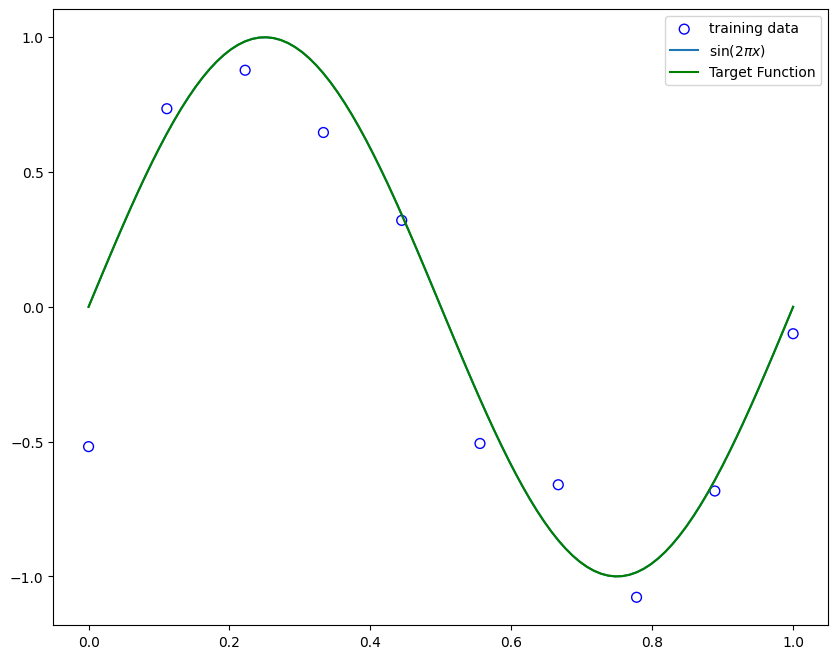

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y


def sinusoidal(x):
    return np.sin(2 * np.pi * x)


x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

plt.figure(figsize=[10, 8])
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

Text(0.5, 0.01, 'Polynomial, Gaussian and Sigmoidal basis functions')

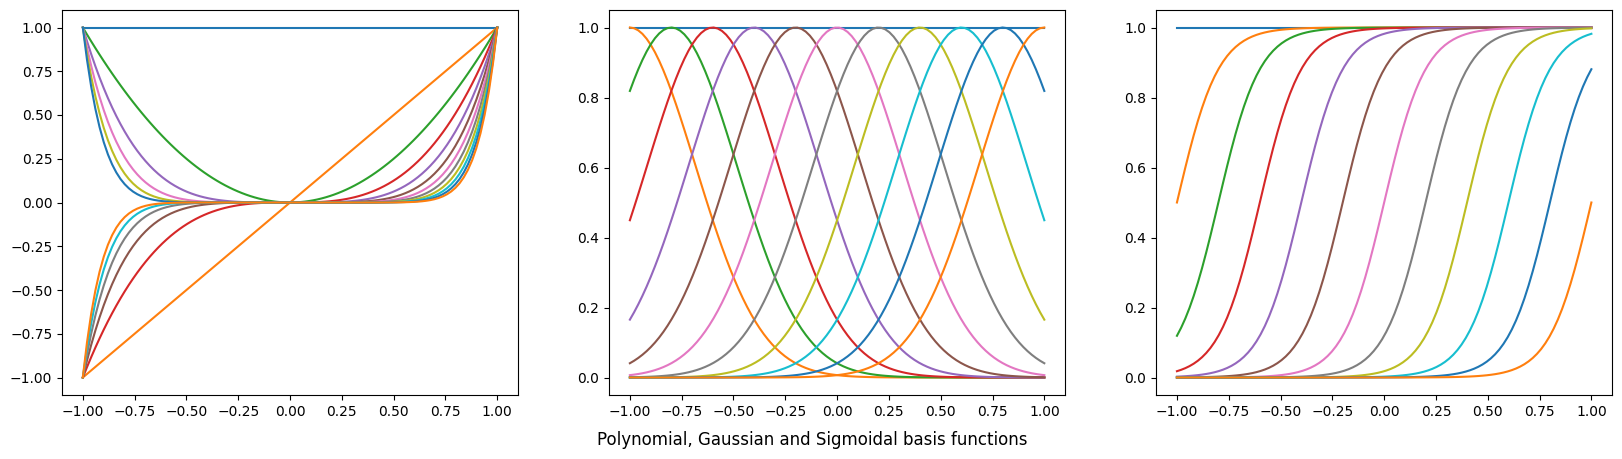

In [3]:
x = np.linspace(-1, 1, 100)
X_polynomial = PolynomialFeature(11).transform(x[:, None])
X_gaussian = GaussianFeature(np.linspace(-1, 1, 11), 0.1).transform(x)
X_sigmoidal = SigmoidalFeature(np.linspace(-1, 1, 11), 10).transform(x)

plt.figure(figsize=(20, 5))
for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1)
    for j in range(12):
        plt.plot(x, X[:, j])
txt = "Polynomial, Gaussian and Sigmoidal basis functions"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment="center", fontsize=12)

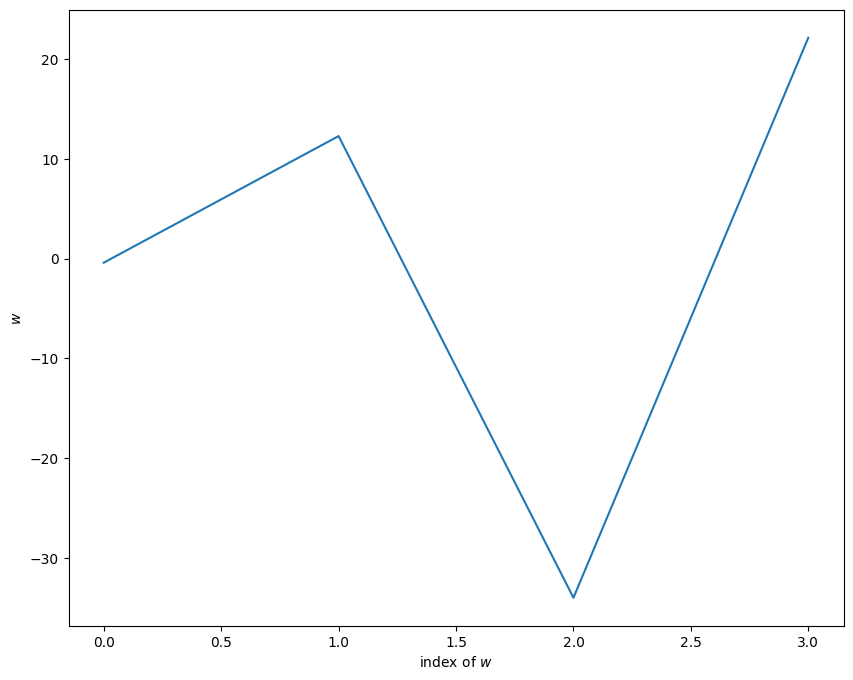

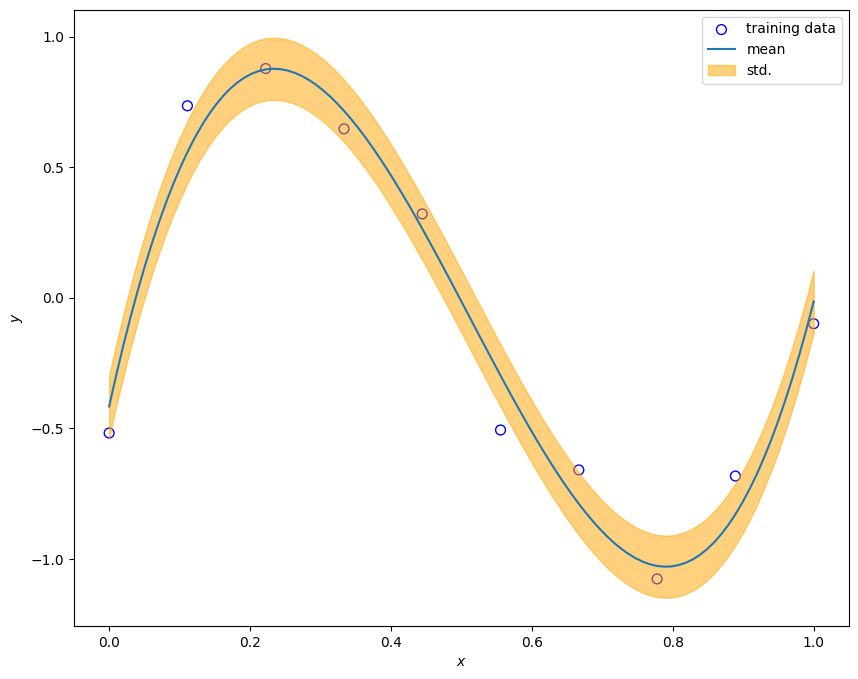

In [4]:
M = 3
# Pick one of the three features below
feature = PolynomialFeature(M)
# feature = GaussianFeature(np.linspace(0, 1, M), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, M), 10)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=[10, 8])
plt.plot(model.w)
plt.xlabel("index of $w$")
plt.ylabel("$w$")

y, y_std = model.predict(X_test, return_std=True)

plt.figure(figsize=[10, 8])

plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y, label="mean")
plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

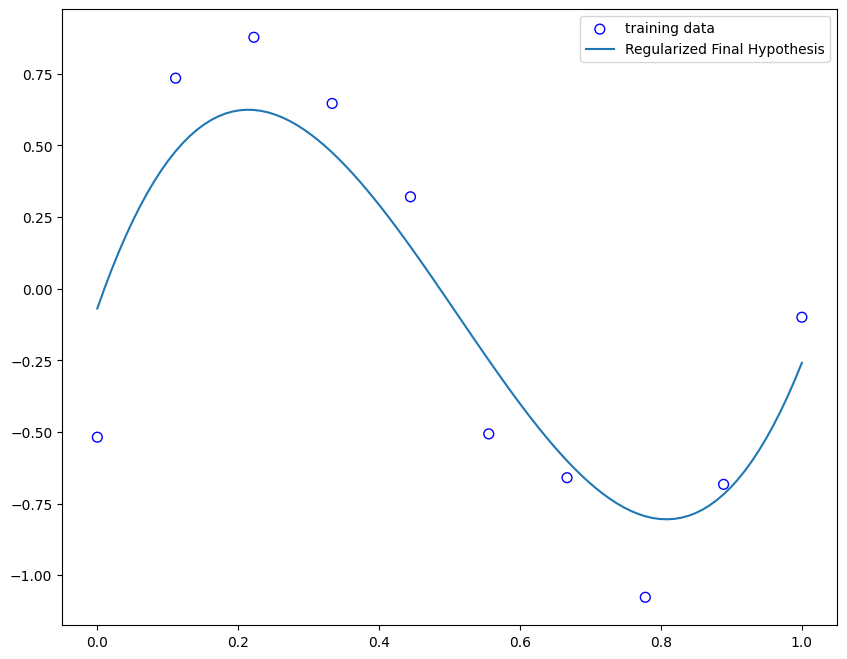

In [5]:
model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

plt.figure(figsize=[10, 8])
plt.scatter(
    x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data"
)
plt.plot(x_test, y, label="Regularized Final Hypothesis")
plt.legend()
plt.show()